# Model Fixed Slope - Parametric Modulation Analysis
## Useful if you are anticipating that the amplitude of the response may be different for each stimulus dimension or will change over time
### PMOD -  Modulated regressor
### EVENT - Event regressor

In [1]:
from glob import glob
from scipy import stats
from math import sqrt
import nibabel as nb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('muted')

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
proj_dir = '/home/data/madlab/data/mri/wmaze' 
mask_filenames = []
cope_files = []
for SID in sids:
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_' 
                               + SID + '/_anatmask_xfm*/*')
    mask_filenames.append(mask_filenames_glob)
    subjcopes_glob = glob(proj_dir + '/scndlvl/wmaze_MRthesis/fixed_before_conditional/model_fixed_PMA-slope/' 
                          + SID + '/fixedfx/cope_PMA*')
    subjcopes_glob.sort()
    cope_files.append(subjcopes_glob)    
    if len(cope_files[-1]) == 0:
        print(SID)

## Cell to double-check the array indexing

In [ ]:
'''
print '## left hippocampus:', mask_filenames[0][0]
print '## left caudate:', mask_filenames[0][1]
print '## right caudate:', mask_filenames[0][2]
print '## left dmPFC:', mask_filenames[0][3]
print '## right hippocampus:', mask_filenames[0][4]
print '## right dmPFC:', mask_filenames[0][5]
print '## left putamen', mask_filenames[0][6]
print '## right_putamen', mask_filenames[0][7]
'''
print '-----'
print '## EVENT #1:', cope_files[0][0]
print '## PMOD #2:', cope_files[0][1]

### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [2]:
all_data = {'subjid':[],
            #HPC
            'lhhp_event':[], 'rhhp_event':[], 
            'lhhp_pmod':[], 'rhhp_pmod':[],
            #Caudate
            'lhcaud_event':[], 'rhcaud_event':[], 
            'lhcaud_pmod':[], 'rhcaud_pmod':[],
            #Putamen
            'lhput_event':[], 'rhput_event':[], 
            'lhput_pmod':[], 'rhput_pmod':[]}
for i in range(len(sids)):
    all_data['subjid'].append(sids[i])
    lh_hp_img = nb.load(mask_filenames[i][0])
    rh_hp_img = nb.load(mask_filenames[i][4])
    lh_caud_img = nb.load(mask_filenames[i][1])
    rh_caud_img = nb.load(mask_filenames[i][2])
    lh_put_img = nb.load(mask_filenames[i][6])
    rh_put_img = nb.load(mask_filenames[i][7])    
    event_img = nb.load(cope_files[i][0])
    pmod_img = nb.load(cope_files[i][1])    
    ########################
    ### Left Hippocampus ###
    ########################    
    # event
    lh_hp_event_data = event_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_event'].append(np.mean(lh_hp_event_data))    
    # pmod
    lh_hp_pmod_data = pmod_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_pmod'].append(np.mean(lh_hp_pmod_data))    
    #########################
    ### Right Hippocampus ###
    #########################    
    # event
    rh_hp_event_data = event_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_event'].append(np.mean(rh_hp_event_data))    
    # pmod
    rh_hp_pmod_data = pmod_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_pmod'].append(np.mean(rh_hp_pmod_data))  
    ####################
    ### Left Caudate ###
    ####################    
    # event
    lh_caud_event_data = event_img.get_data()[lh_caud_img.get_data() > 0.]
    all_data['lhcaud_event'].append(np.mean(lh_caud_event_data))    
    # pmod
    lh_caud_pmod_data = pmod_img.get_data()[lh_caud_img.get_data() > 0.]
    all_data['lhcaud_pmod'].append(np.mean(lh_caud_pmod_data))    
    #####################
    ### Right Caudate ###
    #####################     
    # event
    rh_caud_event_data = event_img.get_data()[rh_caud_img.get_data() > 0.]
    all_data['rhcaud_event'].append(np.mean(rh_caud_event_data))    
    # pmod
    rh_caud_pmod_data = pmod_img.get_data()[rh_caud_img.get_data() > 0.]
    all_data['rhcaud_pmod'].append(np.mean(rh_caud_pmod_data))    
    ####################
    ### Left Putamen ###
    ####################    
    # event
    lh_put_event_data = event_img.get_data()[lh_put_img.get_data() > 0.]
    all_data['lhput_event'].append(np.mean(lh_put_event_data))    
    # pmod
    lh_put_pmod_data = pmod_img.get_data()[lh_put_img.get_data() > 0.]
    all_data['lhput_pmod'].append(np.mean(lh_put_pmod_data))    
    #####################
    ### Right Putamen ###
    #####################    
    # event
    rh_put_event_data = event_img.get_data()[rh_put_img.get_data() > 0.]
    all_data['rhput_event'].append(np.mean(rh_put_event_data))    
    # pmod
    rh_put_pmod_data = pmod_img.get_data()[rh_put_img.get_data() > 0.]
    all_data['rhput_pmod'].append(np.mean(rh_put_pmod_data))    
all_data_df = pd.DataFrame(all_data)

### Combine the two hemispheres to create one regional average

In [3]:
all_data_df['hp_all_event'] = (all_data_df['lhhp_event'] + all_data_df['rhhp_event'])/2.
all_data_df['hp_all_pmod'] = (all_data_df['lhhp_pmod'] + all_data_df['rhhp_pmod'])/2.
all_data_df['caud_all_event'] = (all_data_df['lhcaud_event'] + all_data_df['rhcaud_event'])/2.
all_data_df['caud_all_pmod'] = (all_data_df['lhcaud_pmod'] + all_data_df['rhcaud_pmod'])/2.
all_data_df['put_all_event'] = (all_data_df['lhput_event'] + all_data_df['rhput_event'])/2.
all_data_df['put_all_pmod'] = (all_data_df['lhput_pmod'] + all_data_df['rhput_pmod'])/2.

In [4]:
hpc_chart = {}
hpc_chart['1_HPC-event'] = all_data_df['hp_all_event'] 
hpc_chart['2_HPC-pmod'] = all_data_df['hp_all_pmod'] 
hpc_chart_df = pd.DataFrame.from_dict(hpc_chart)

In [5]:
hpc_chart_df

,1_HPC-event,2_HPC-pmod
0,1.046890,-1.213215
1,-6.597510,8.891224
2,1.805065,0.469254
3,-0.795367,0.996101
4,-0.739644,-4.993117
5,1.704904,-4.236754
6,-0.295101,4.692358
7,-1.641113,0.842092
8,-3.341831,-1.756932
9,-1.581428,8.147089


## Hippocampus Activation

PMOD mean: 1.96305439447
PMOD std: 4.74925652678

EVENT mean: -0.966081871092
EVENT std: 2.21765282869

T-test: Hippocampus PMOD vs. EVENT
Ttest_relResult(statistic=2.1605237287430406, pvalue=0.043714578618906298)
Cohen's d =  1.08936896514


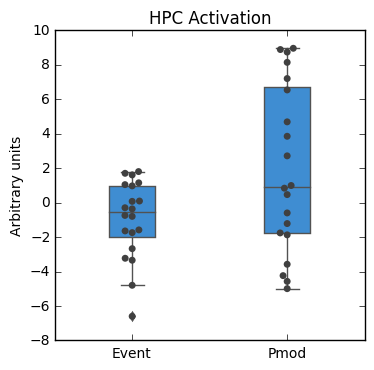

In [13]:
print 'PMOD mean:', np.mean(all_data_df['hp_all_pmod'])
print 'PMOD std:', np.std(all_data_df['hp_all_pmod'])
print ""
print 'EVENT mean:', np.mean(all_data_df['hp_all_event'])
print 'EVENT std:', np.std(all_data_df['hp_all_event'])
print ""
print 'T-test: Hippocampus PMOD vs. EVENT'
print stats.ttest_rel(all_data_df['hp_all_pmod'], all_data_df['hp_all_event'])
cohens_d = ((np.average(all_data_df['hp_all_pmod']) - np.average(all_data_df['hp_all_event'])) 
            / (sqrt((np.std(all_data_df['hp_all_pmod'], ddof = 1)) 
            ** 2 + np.std(all_data_df['hp_all_event'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d
N = 2
conditions = ['Event', 'Pmod']
hp_allsubjs = [all_data_df['hp_all_event'], 
               all_data_df['hp_all_pmod']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("HPC Activation")
plt.savefig("/home/arenf001/fixed_slope-HPC.jpg", dpi = 1080)
plt.show()

### Caudate Stats

In [7]:
#create Pandas dataframe to store correlations
caud_chart = {}
caud_chart['1_CA-event'] = all_data_df['caud_all_event'] 
caud_chart['2_CA-pmod'] = all_data_df['caud_all_pmod'] 
caud_chart_df = pd.DataFrame.from_dict(caud_chart)

In [8]:
caud_chart_df

,1_CA-event,2_CA-pmod
0,4.255967,9.123012
1,-3.698892,5.346128
2,0.801734,8.150032
3,4.512890,5.008217
4,-3.414064,2.012123
5,4.815411,-15.894634
6,1.826729,-1.822538
7,0.576028,-4.646029
8,1.473530,3.497690
9,0.150067,19.359873


PMOD mean: 0.022529104352
PMOD std: 7.2807014019

EVENT mean: 1.75029556546
EVENT std: 2.53189805667

T-test: Caudate PMOD vs. EVENT
Ttest_relResult(statistic=-0.89397288059187485, pvalue=0.38252102944370758)
Cohen's d =  -0.436931873938


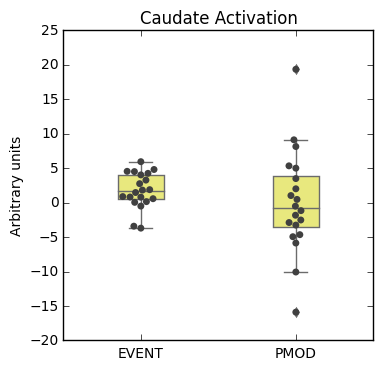

In [15]:
print 'PMOD mean:', np.mean(all_data_df['caud_all_pmod'])
print 'PMOD std:', np.std(all_data_df['caud_all_pmod'])
print ""
print 'EVENT mean:', np.mean(all_data_df['caud_all_event'])
print 'EVENT std:', np.std(all_data_df['caud_all_event'])
print ""
print 'T-test: Caudate PMOD vs. EVENT'
print stats.ttest_rel(all_data_df['caud_all_pmod'], all_data_df['caud_all_event'])
cohens_d = ((np.average(all_data_df['caud_all_pmod']) - np.average(all_data_df['caud_all_event'])) 
            / (sqrt((np.std(all_data_df['caud_all_pmod'], ddof = 1)) 
            ** 2 + np.std(all_data_df['caud_all_event'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d
N = 2
conditions = ['EVENT', 'PMOD']
caud_allsubjs = [all_data_df['caud_all_event'], 
                 all_data_df['caud_all_pmod']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = caud_allsubjs, color = "#f9f96d", width = 0.3)
ax2 = sns.swarmplot(data = caud_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate Activation")
plt.savefig("/home/arenf001/fixed_slope-CAUD.jpg", dpi = 1080)
plt.show()

### Putamen Stats

In [10]:
put_chart = {}
put_chart['1_PT-event'] = all_data_df['put_all_event'] 
put_chart['2_PT-pmod'] = all_data_df['put_all_pmod']  
put_chart_df = pd.DataFrame.from_dict(put_chart)

In [11]:
put_chart_df

,1_PT-event,2_PT-pmod
0,3.372093,-2.138389
1,-4.145675,3.912957
2,0.410518,4.440071
3,-1.130194,1.396572
4,-0.808977,-4.994750
5,5.736080,-3.478162
6,0.336861,-2.554123
7,-3.055345,1.755822
8,-0.706640,8.247685
9,0.772219,5.607947


PMOD mean: 0.503331949655
PMOD std: 3.82742883554

EVENT mean: 0.626112129539
EVENT std: 2.23615865285

T-test: Putamen PMOD vs. EVENT
Ttest_relResult(statistic=-0.11007704553689635, pvalue=0.91350265043332912)
Cohen's d =  -0.0539936912287


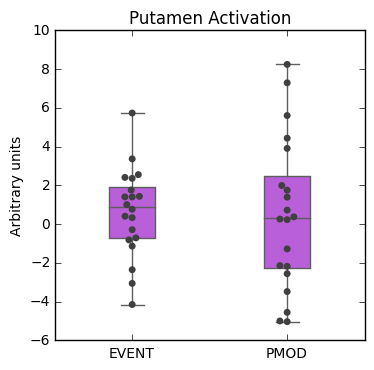

In [16]:
print 'PMOD mean:', np.mean(all_data_df['put_all_pmod'])
print 'PMOD std:', np.std(all_data_df['put_all_pmod'])
print ""
print 'EVENT mean:', np.mean(all_data_df['put_all_event'])
print 'EVENT std:', np.std(all_data_df['put_all_event'])
print ""
print 'T-test: Putamen PMOD vs. EVENT'
print stats.ttest_rel(all_data_df['put_all_pmod'], all_data_df['put_all_event'])
cohens_d = ((np.average(all_data_df['put_all_pmod']) - np.average(all_data_df['put_all_event'])) 
            / (sqrt((np.std(all_data_df['put_all_pmod'], ddof = 1)) 
            ** 2 + np.std(all_data_df['put_all_event'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d
N = 2
conditions = ['EVENT', 'PMOD']
put_allsubjs = [all_data_df['put_all_event'], 
                all_data_df['put_all_pmod']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = put_allsubjs, color = "#c34aef", width = 0.3)
ax2 = sns.swarmplot(data = put_allsubjs, color='.25')
ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")
plt.savefig("/home/arenf001/fixed_slope-PUT.jpg", dpi = 1080)
plt.show()